## Initial Data Exploration

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

### Read the dataset

In [51]:
UFO_PATH = "C:/Users/Elif Surucu/Documents/Flatiron/Assesments/Practice4/UFO-Sightings/complete.csv"
df_complete = pd.read_csv(UFO_PATH, on_bad_lines='skip')

df_complete.head()







C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_42960\2393739624.py:2: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_complete = pd.read_csv(UFO_PATH, on_bad_lines='skip')


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


### Clean Up Newline Characters in Column Names

In [52]:
renaming_table = {
    "datetime": "sighting_time",
    "city": "city_name",
    "state": "state_code",
    "country": "country_code",
    "shape": "ufo_shape",
    "duration (seconds)": "duration_seconds",
    "duration (hours/min)": "duration_text",
    "comments": "sighting_comments",
    "date posted": "report_posted_date",
    "latitude": "latitude",
    "longitude": "longitude",
}

# Kolonları yeniden adlandırın
df_complete.rename(columns=renaming_table, inplace=True)

# Kontrol edin
print(df_complete.columns)

Index(['sighting_time', 'city_name', 'state_code', 'country_code', 'ufo_shape',
       'duration_seconds', 'duration_text', 'sighting_comments',
       'report_posted_date', 'latitude', 'longitude'],
      dtype='object')


In [53]:
df_complete['state_code'].fillna('unknown', inplace=True)
df_complete['country_code'].fillna('unknown', inplace=True)
df_complete['ufo_shape'].fillna('unknown', inplace=True)
df_complete['duration_text'].fillna('unknown', inplace=True)
df_complete['sighting_comments'].fillna('no comment', inplace=True)

# Güncellenmiş bilgiyi kontrol edin
print(df_complete.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sighting_time       88679 non-null  object 
 1   city_name           88679 non-null  object 
 2   state_code          88679 non-null  object 
 3   country_code        88679 non-null  object 
 4   ufo_shape           88679 non-null  object 
 5   duration_seconds    88677 non-null  object 
 6   duration_text       88679 non-null  object 
 7   sighting_comments   88679 non-null  object 
 8   report_posted_date  88679 non-null  object 
 9   latitude            88679 non-null  object 
 10  longitude           88679 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.4+ MB
None


In [54]:
print(df_complete.isna().sum())
df_complete.dropna(inplace=True)

sighting_time         0
city_name             0
state_code            0
country_code          0
ufo_shape             0
duration_seconds      2
duration_text         0
sighting_comments     0
report_posted_date    0
latitude              0
longitude             0
dtype: int64


ufo_shape
light        17872
unknown       9241
triangle      8489
circle        8453
fireball      6562
other         6247
disk          6005
sphere        5755
oval          4119
formation     2656
cigar         2241
changing      2140
flash         1472
rectangle     1417
cylinder      1382
diamond       1308
chevron       1007
egg            845
teardrop       817
cone           367
cross          265
delta            8
round            2
crescent         2
pyramid          1
flare            1
hexagon          1
dome             1
changed          1
Name: count, dtype: int64


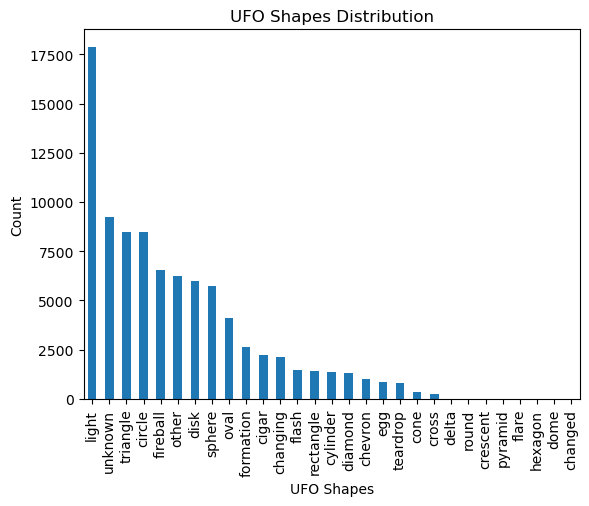

In [55]:
ufo_shapes_distribution = df_complete['ufo_shape'].value_counts()
print(ufo_shapes_distribution)


ufo_shapes_distribution.plot(kind='bar', title='UFO Shapes Distribution')
plt.xlabel('UFO Shapes')
plt.ylabel('Count')
plt.show()

<Axes: title={'center': 'UFO Sightings Over the Years'}, xlabel='year'>

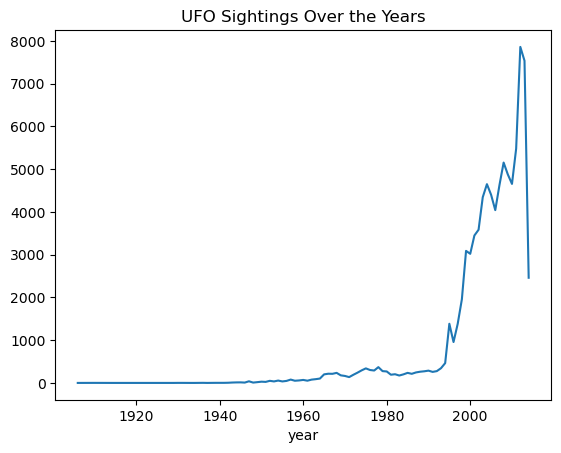

In [56]:
#Distribution of UFO sightings by year
df_complete['sighting_time'] = pd.to_datetime(df_complete['sighting_time'], errors='coerce')
df_complete['year'] = df_complete['sighting_time'].dt.year

df_complete['year'].value_counts().sort_index().plot(kind='line', title='UFO Sightings Over the Years')

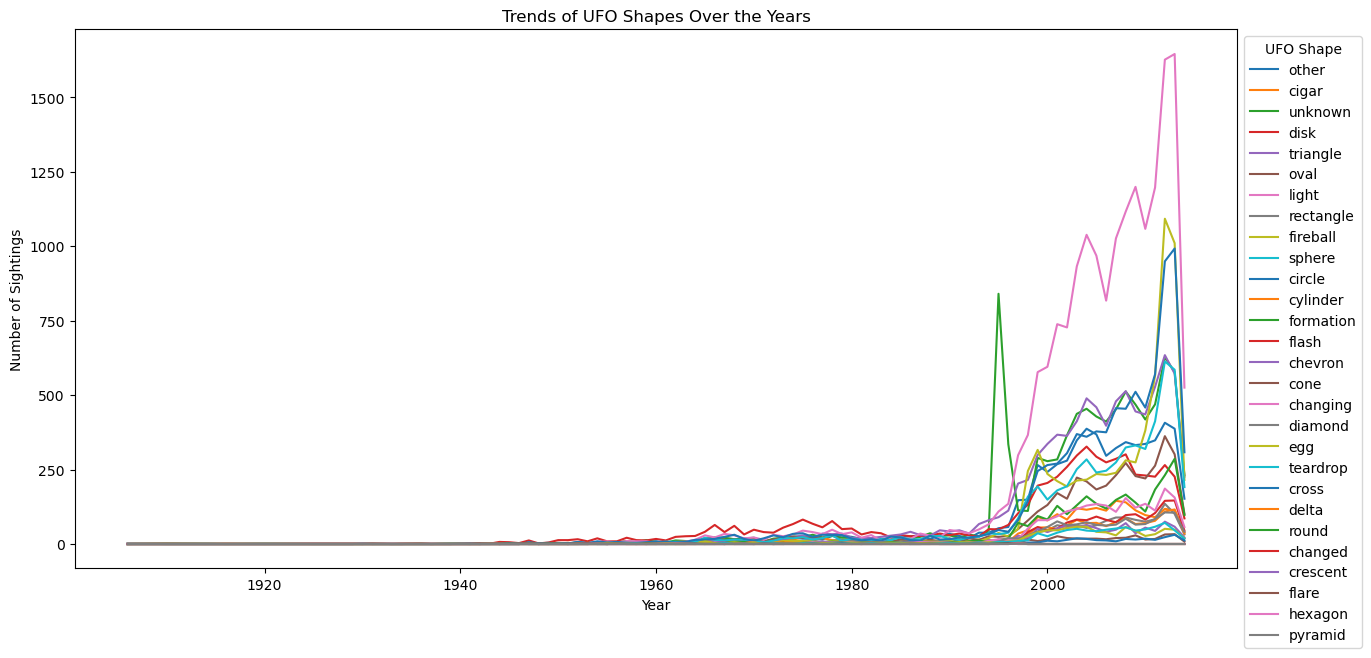

In [57]:
shape_trends = df_complete.groupby(['year', 'ufo_shape']).size().unstack().fillna(0)
shape_trends.plot(kind='line', figsize=(15, 7))
plt.title('Trends of UFO Shapes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.legend(title='UFO Shape', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

In [58]:
df_complete['year'] = df_complete['sighting_time'].dt.year
df_complete['month'] = df_complete['sighting_time'].dt.month

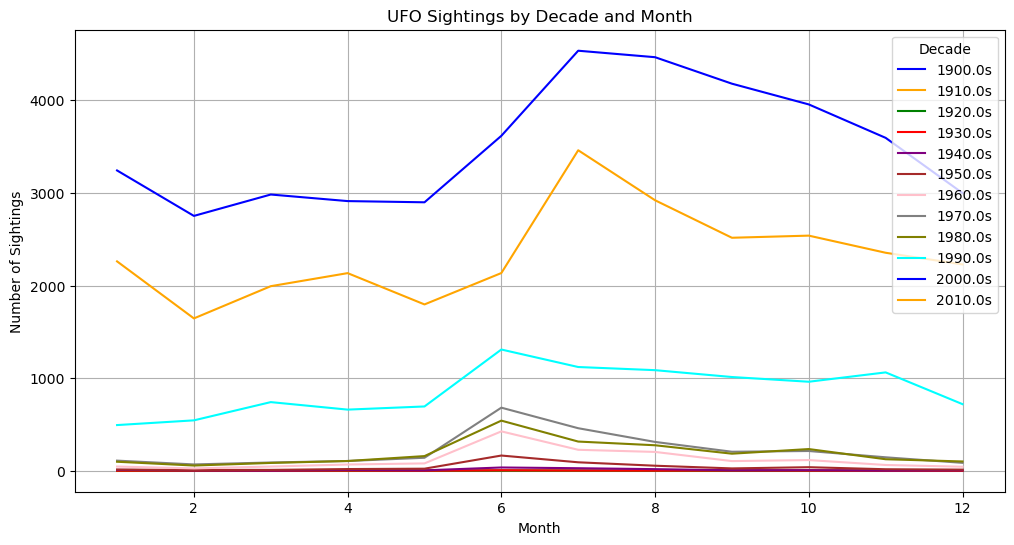

In [59]:
df_complete['decade'] = (df_complete['year'] // 10) * 10

# On yıla ve aya göre gruplama ve sayıları hesaplama
decade_monthly_counts = df_complete.groupby(['decade', 'month']).size().unstack().fillna(0)

# Çizim için renkler listesi
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Grafik çizimi
plt.figure(figsize=(12, 6))
for i, decade in enumerate(decade_monthly_counts.index):
    plt.plot(decade_monthly_counts.columns, decade_monthly_counts.loc[decade],
             label=f"{decade}s", color=colors[i % len(colors)])

plt.title("UFO Sightings by Decade and Month")
plt.xlabel("Month")
plt.ylabel("Number of Sightings")
plt.legend(title="Decade")
plt.grid(True)
plt.show()




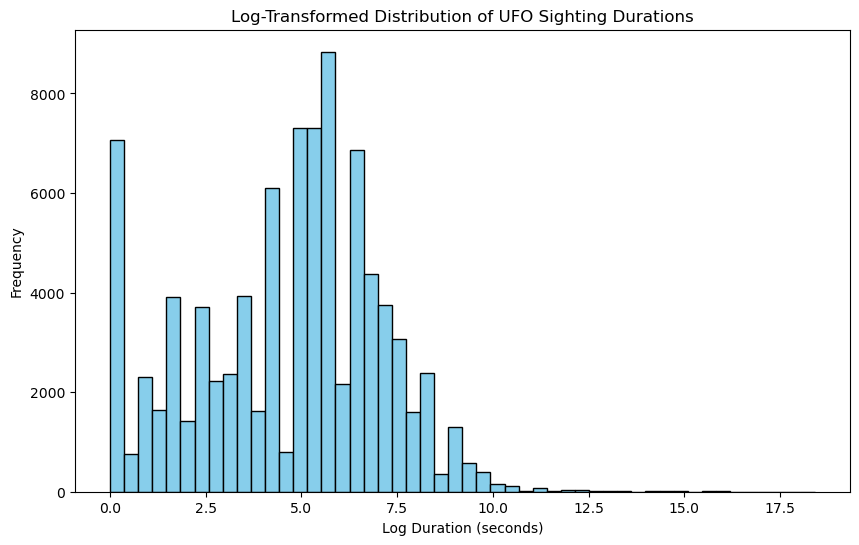

In [60]:

df_complete['duration_seconds'] = pd.to_numeric(df_complete['duration_seconds'], errors='coerce')


df_complete = df_complete.dropna(subset=['duration_seconds'])


df_complete['log_duration'] = np.log1p(df_complete['duration_seconds'])


plt.figure(figsize=(10, 6))
plt.hist(df_complete['log_duration'], bins=50, color='skyblue', edgecolor='black')
plt.title('Log-Transformed Distribution of UFO Sighting Durations')
plt.xlabel('Log Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


In [61]:
def categorize_duration(duration):
    if duration < 60:
        return 'Short (<1 min)'
    elif 60 <= duration <= 3600:
        return 'Medium (1 min - 1 hr)'
    else:
        return 'Long (>1 hr)'

df_complete['duration_category'] = df_complete['duration_seconds'].apply(categorize_duration)

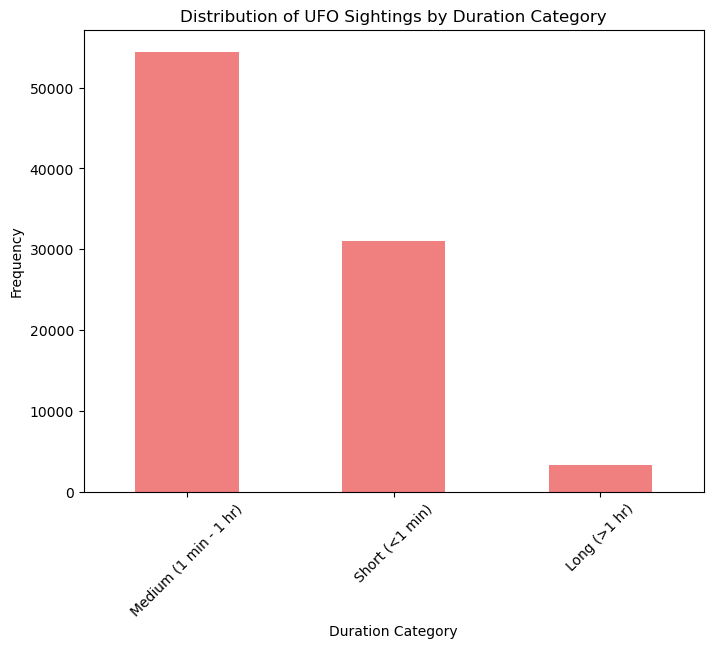

In [62]:
duration_counts = df_complete['duration_category'].value_counts()
duration_counts.plot(kind='bar', color='lightcoral', figsize=(8, 6))
plt.title('Distribution of UFO Sightings by Duration Category')
plt.xlabel('Duration Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

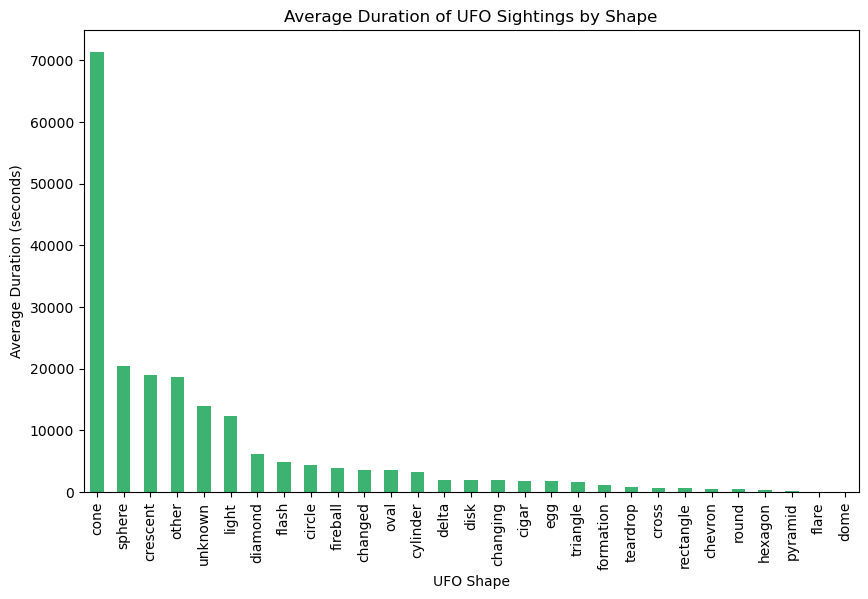

In [63]:
shape_duration_avg = df_complete.groupby('ufo_shape')['duration_seconds'].mean().sort_values(ascending=False)
shape_duration_avg.plot(kind='bar', figsize=(10, 6), color='mediumseagreen')
plt.title('Average Duration of UFO Sightings by Shape')
plt.xlabel('UFO Shape')
plt.ylabel('Average Duration (seconds)')
plt.xticks(rotation=90)
plt.show()

Is there a significant relationship between observation duration and UFO shape?

Is there a relationship between observation period and location (country, state)?